In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Training Dataset.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.drop('Loan_ID',axis=1,inplace=True)

In [6]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [8]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(480, 12)

In [11]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [13]:
data['Dependents'] = data['Dependents'].str.replace('+','').astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null int32
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 46.9+ KB


In [15]:
cat_cols = [feature for feature in data.columns if data[feature].dtype=='O']
num_cols = [feature for feature in data.columns if data[feature].dtype!='O']

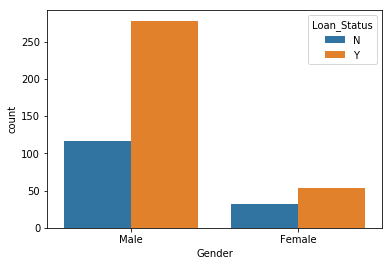

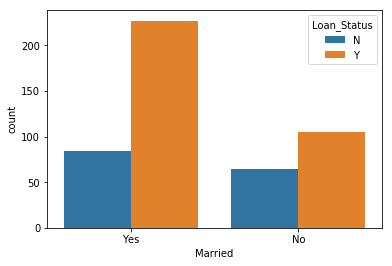

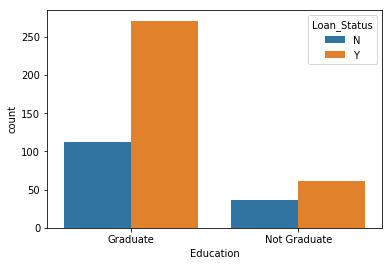

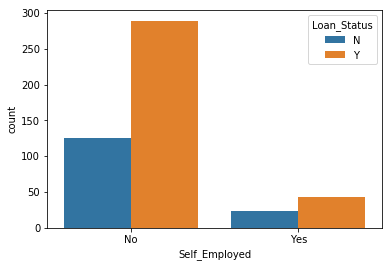

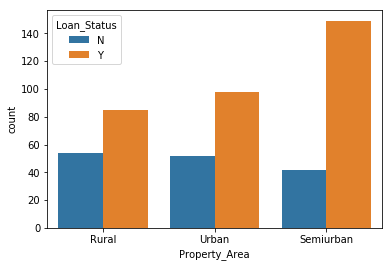

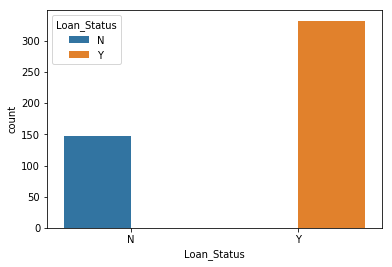

In [17]:
for i in cat_cols:
    sns.countplot(data=data,x=i,hue=data['Loan_Status'])
    plt.show()

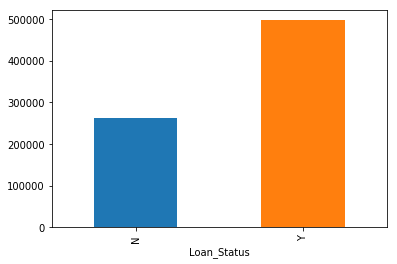

In [22]:
data.groupby('Loan_Status')['CoapplicantIncome'].sum().plot(kind='bar',stacked=True)

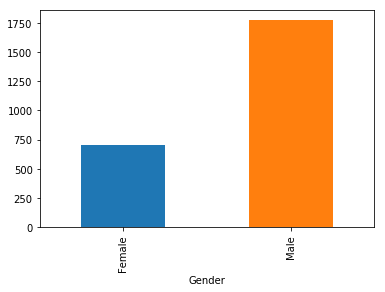

In [24]:
data.groupby('Gender')['CoapplicantIncome'].mean().plot(kind='bar')

In [25]:
from sklearn.preprocessing import LabelEncoder
for i in cat_cols:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [26]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [27]:
x = data.drop('Loan_Status',axis=1)
y = data[['Loan_Status']]

In [28]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [30]:
x_test = sc.transform(x_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def evaluate_model(X_train,y_train,X_test,y_test,models):
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)



        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get R2 scores for train and test data
        #train_model_score = r2_score(ytrain,y_train_pred)
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score

    return report

models={
            'Randomforest':RandomForestClassifier(n_estimators=100),
            'DecisionTreeClassifier':DecisionTreeClassifier(),
            'AdaBoostClassifier':AdaBoostClassifier(),
            'GaussianNB':GaussianNB()
        }
            
model_report:dict=evaluate_model(x_train,y_train,x_test,y_test,models)
print(model_report)
print('\n====================================================================================\n')

            # To get best model score from dictionary 
best_model_score = max(sorted(model_report.values()))

best_model_name = list(model_report.keys())[list(model_report.values()).index(best_model_score)]
            
best_model = models[best_model_name]

print(f'Best Model Found , Model Name : {best_model_name} , R2 Score : {best_model_score}')

C:\Users\k.vidya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


{'Randomforest': 0.8229166666666666, 'DecisionTreeClassifier': 0.7604166666666666, 'AdaBoostClassifier': 0.78125, 'GaussianNB': 0.8229166666666666}


Best Model Found , Model Name : Randomforest , R2 Score : 0.8229166666666666


C:\Users\k.vidya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\k.vidya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.metrics import confusion_matrix
y_pred = best_model.predict(x_test)

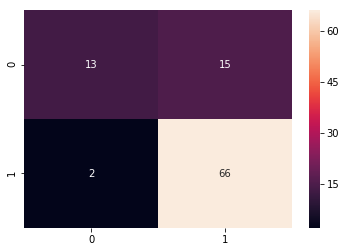

In [33]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()